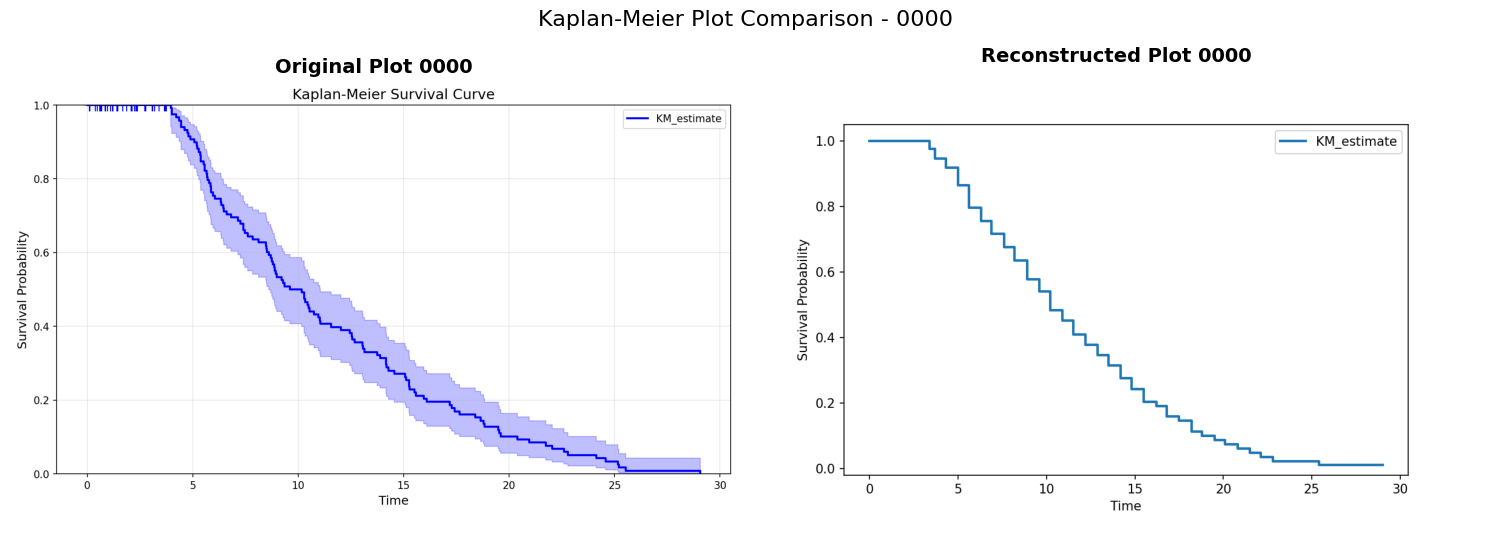

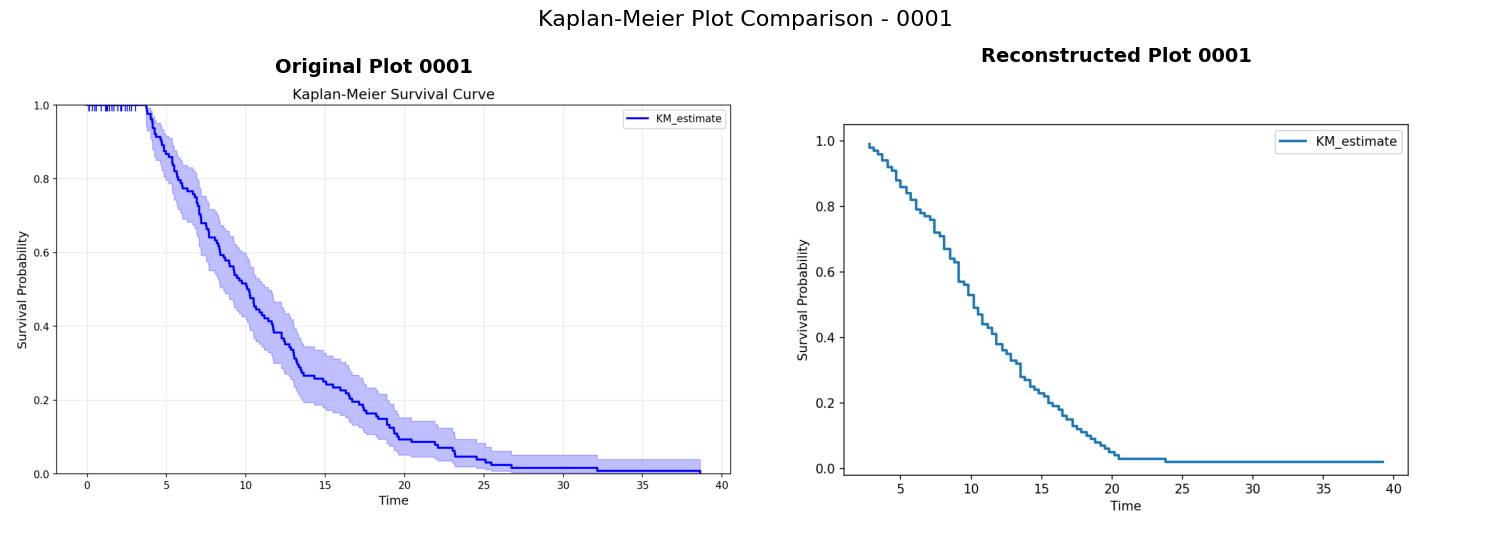

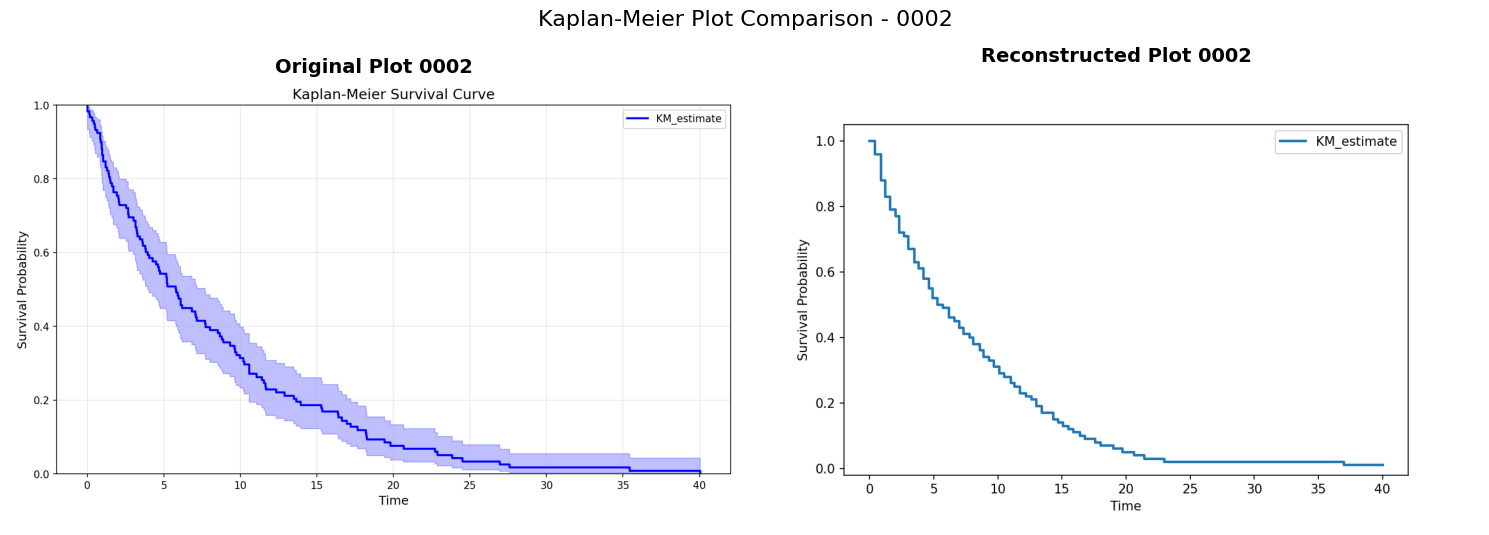

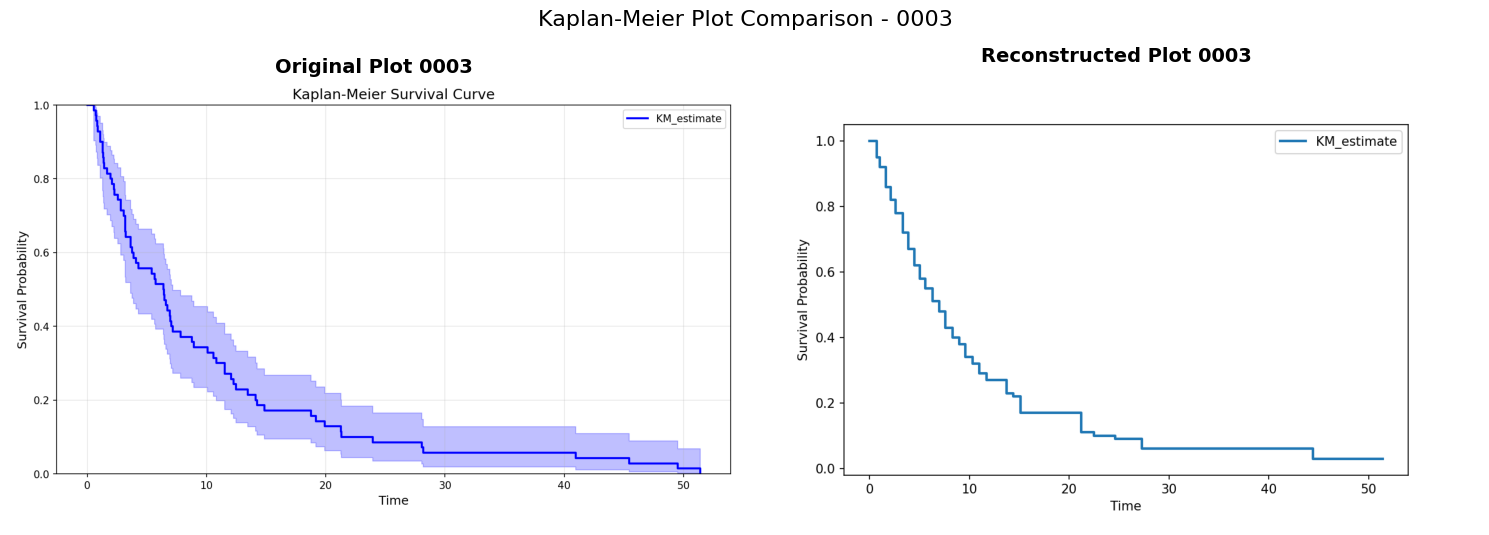

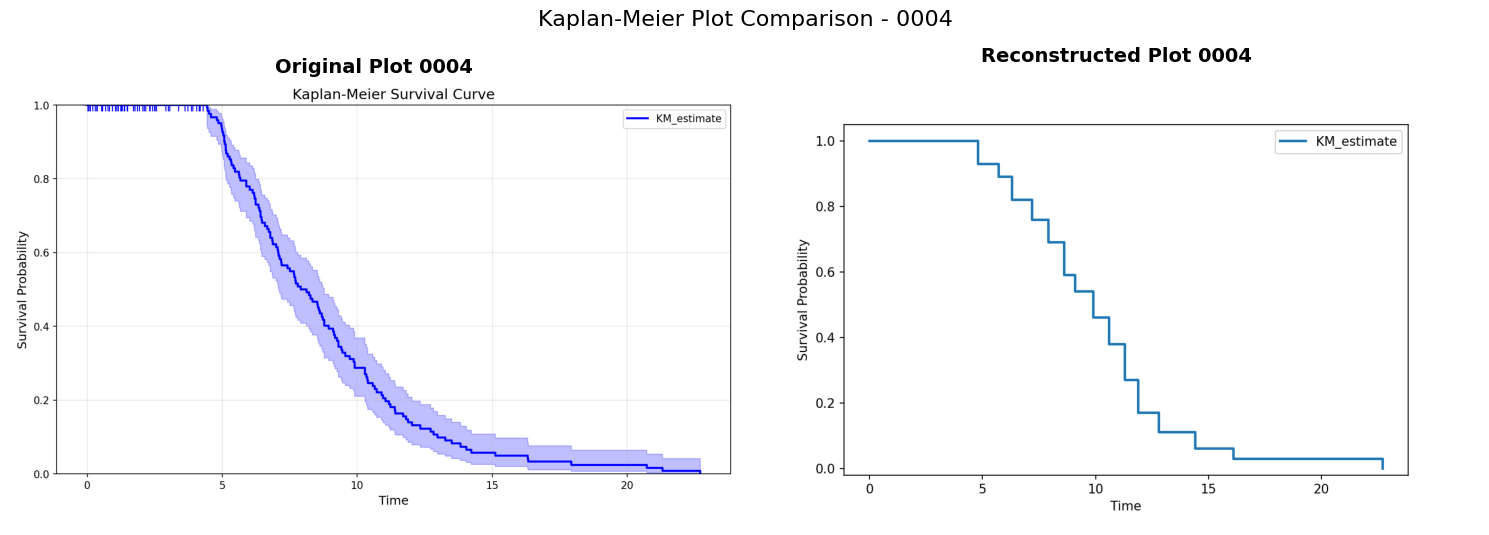

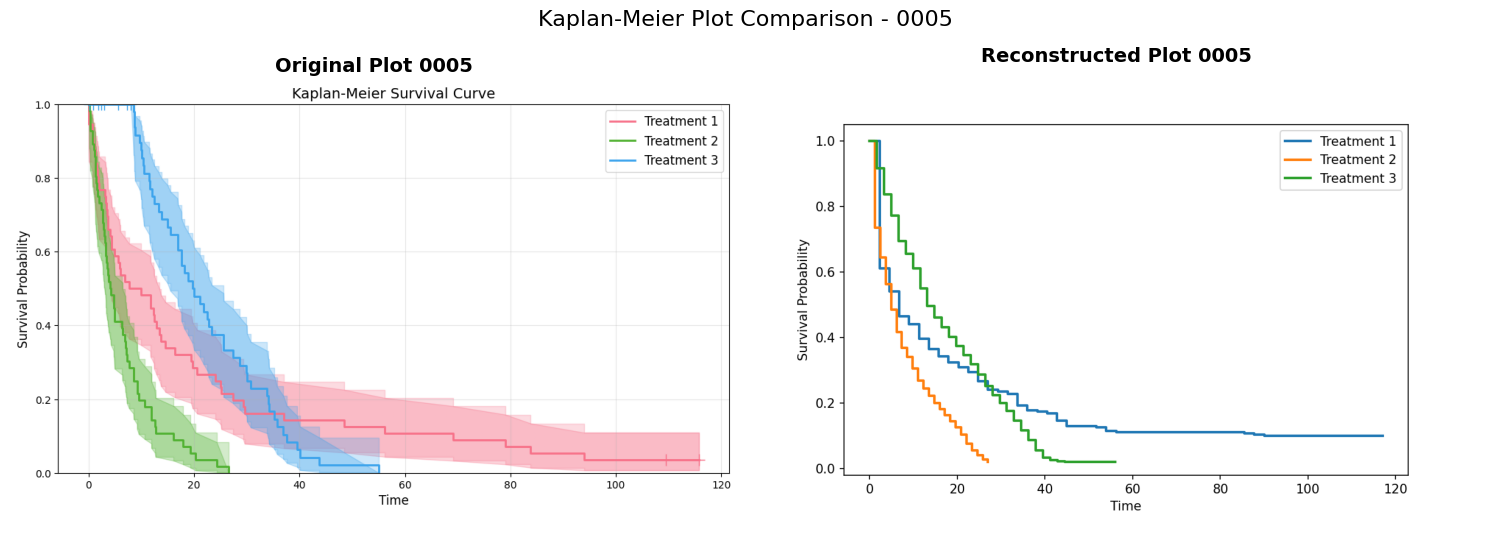

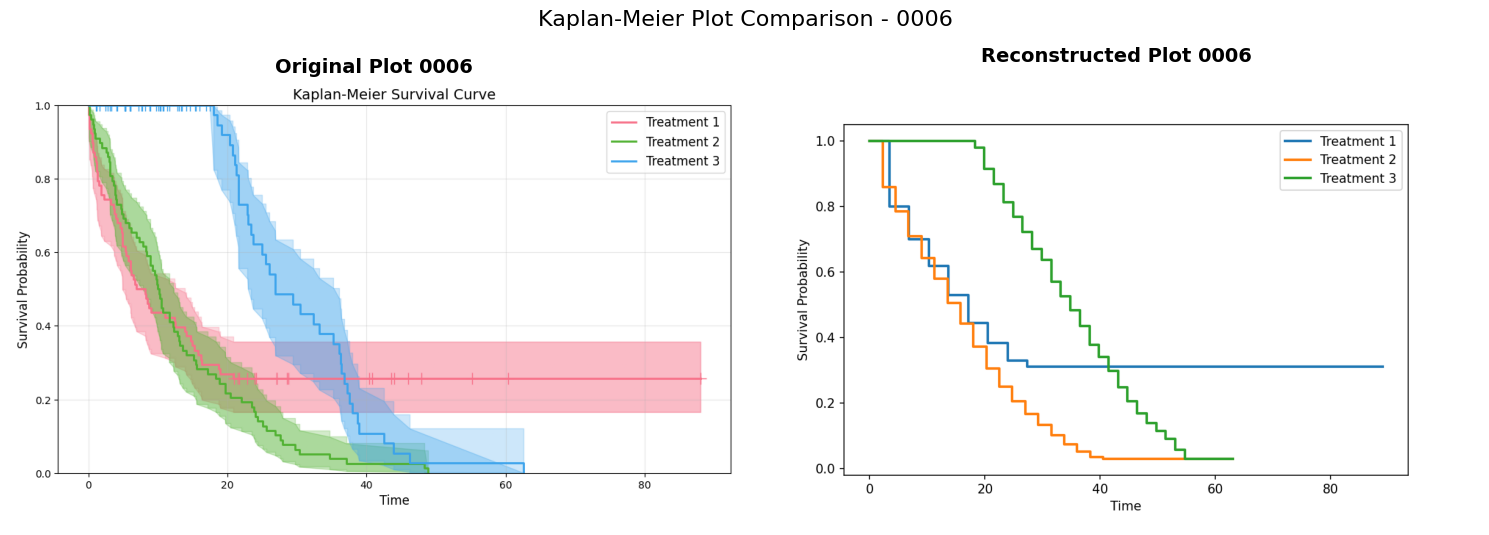

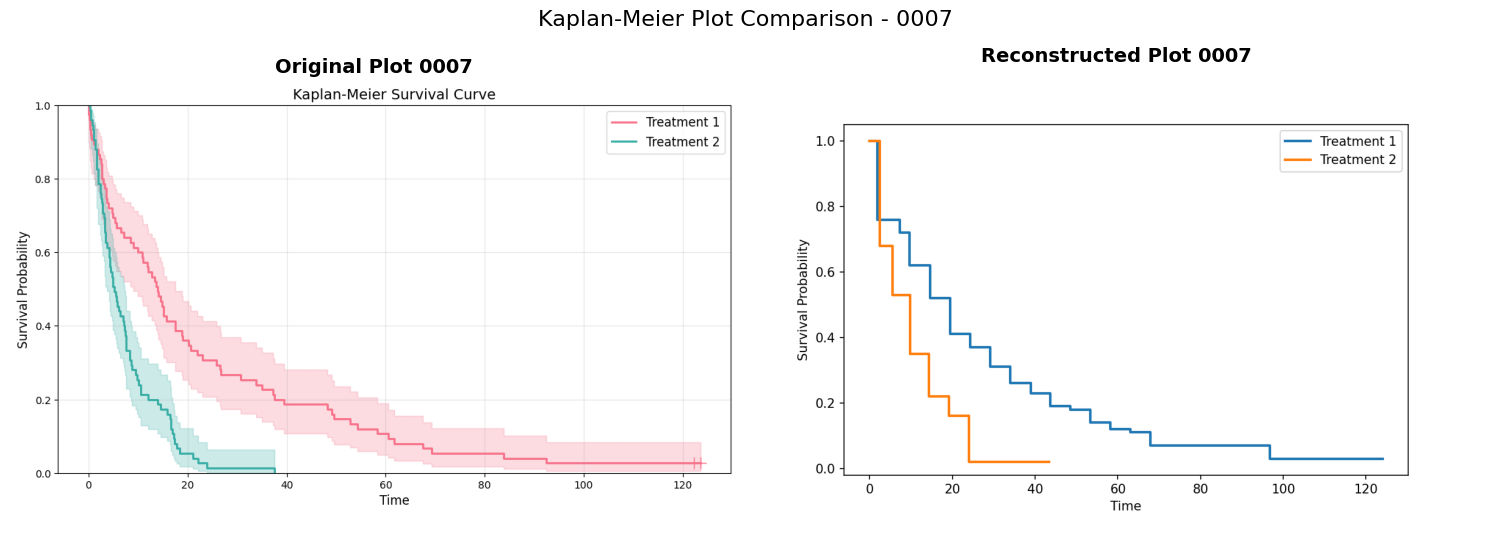

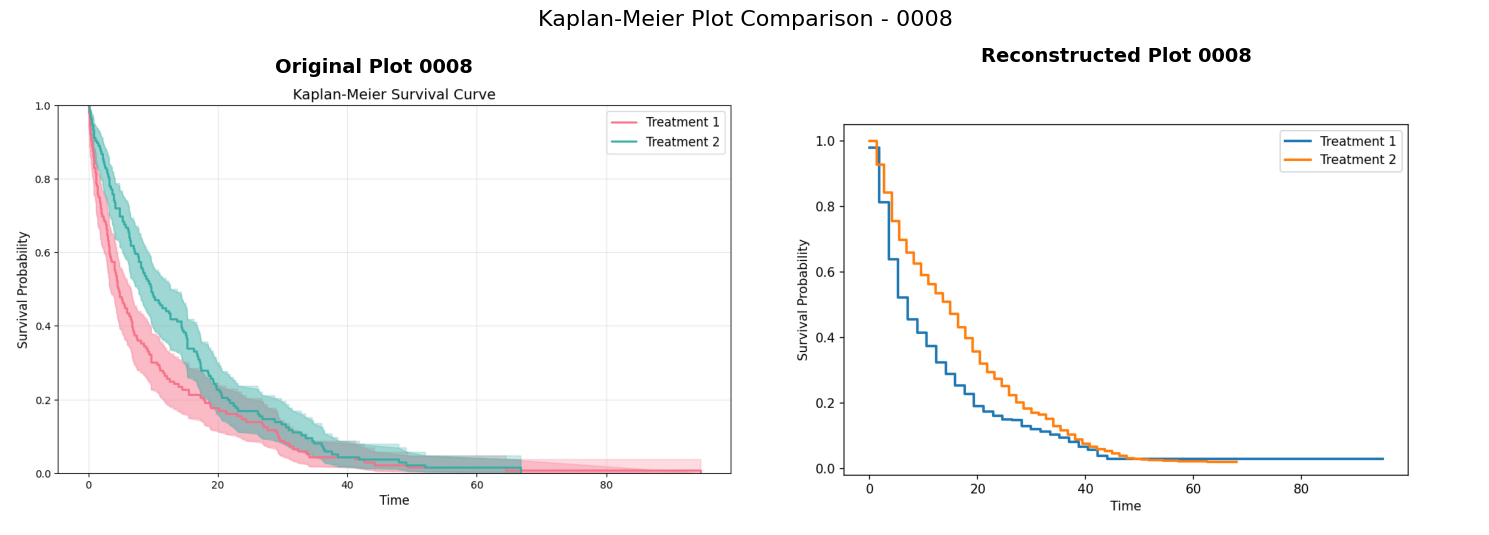

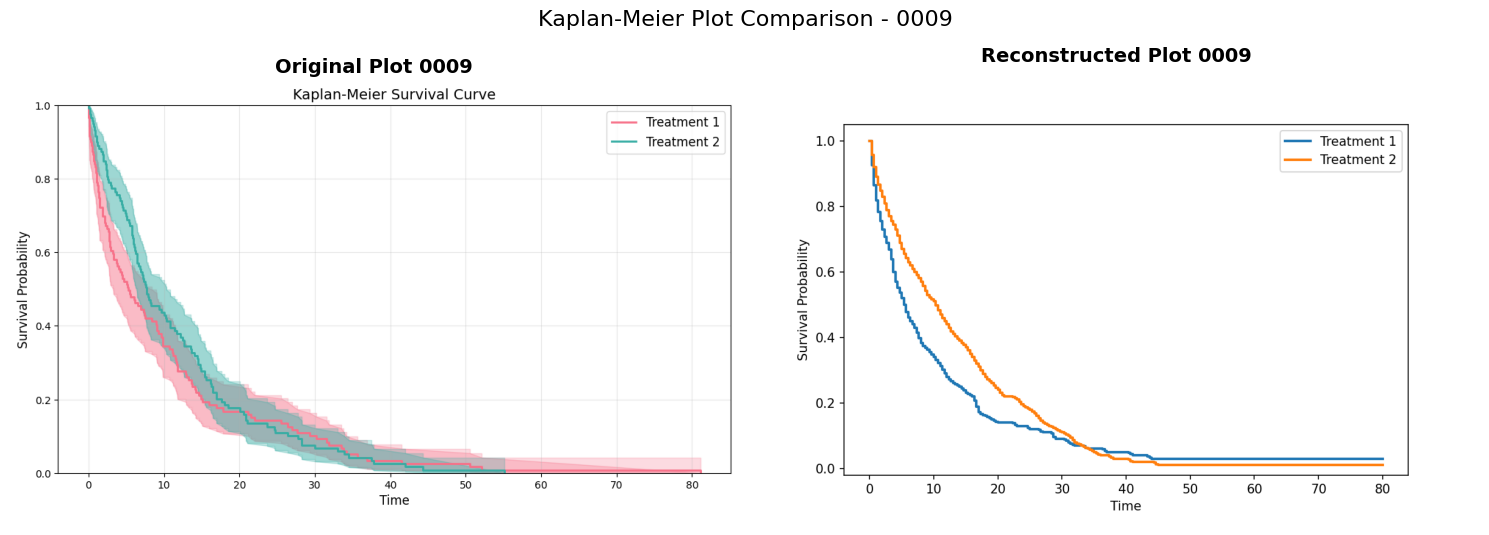

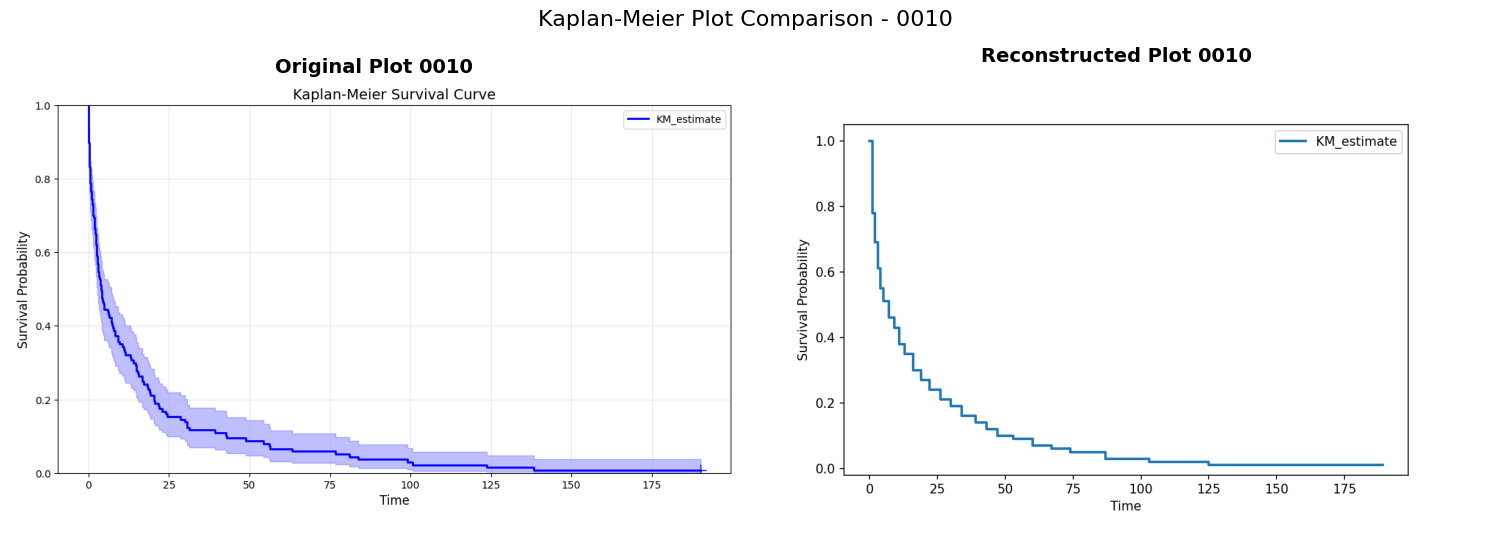

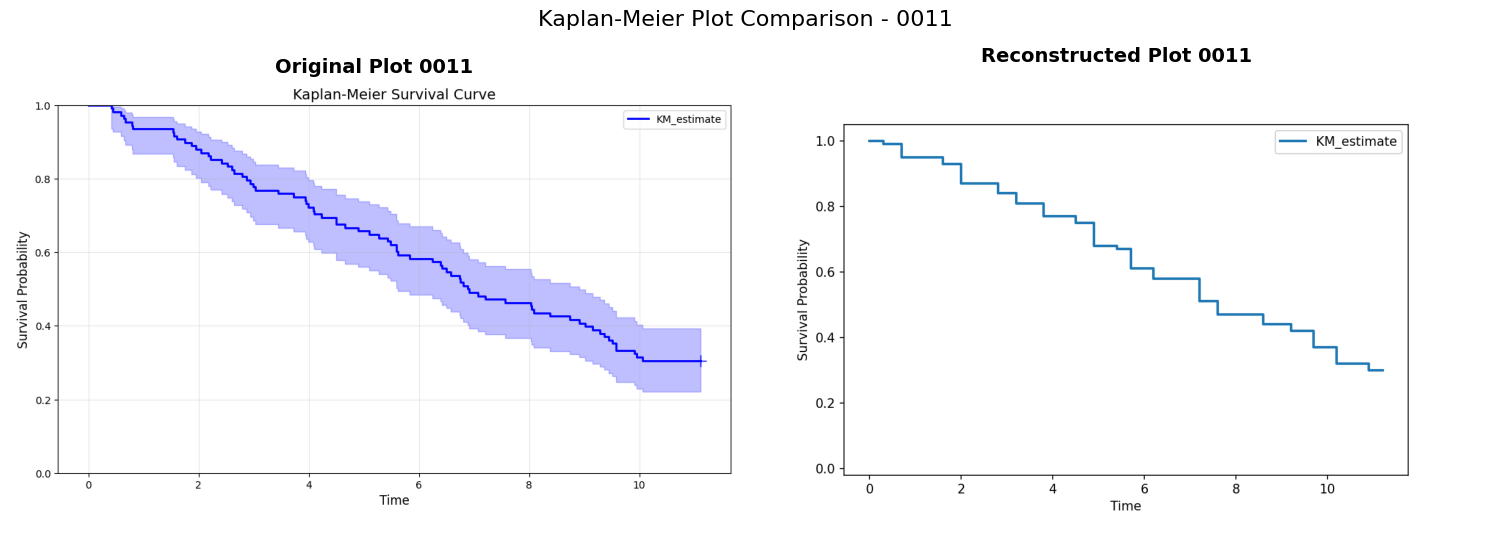

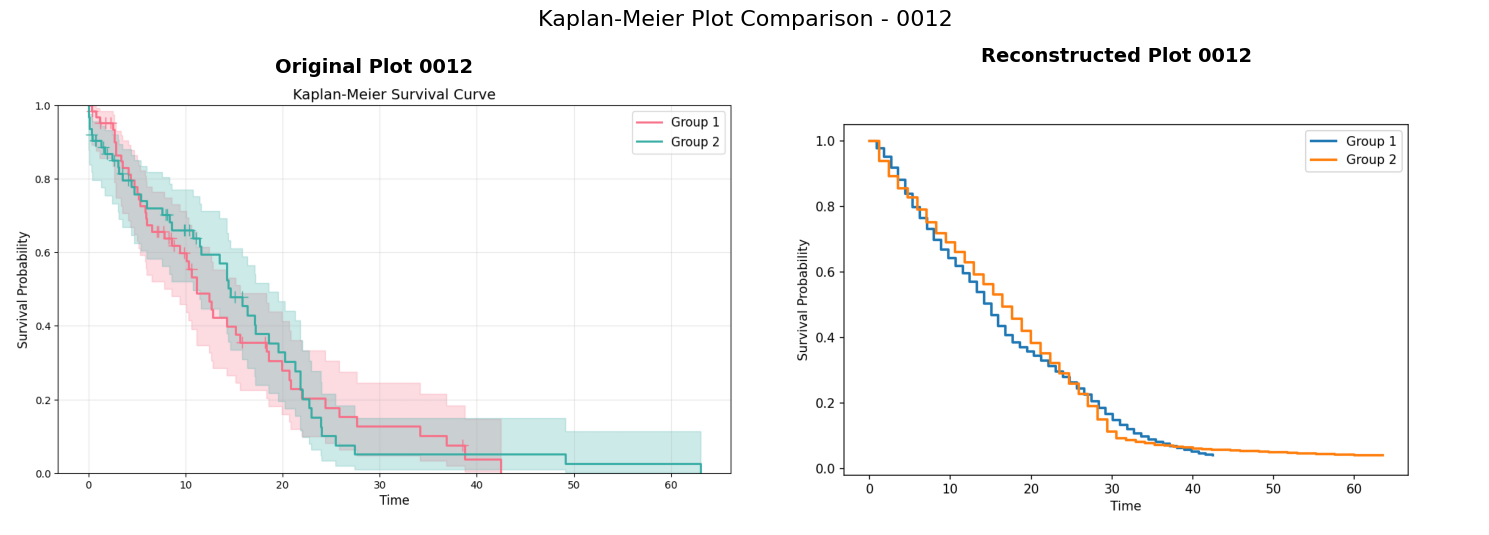

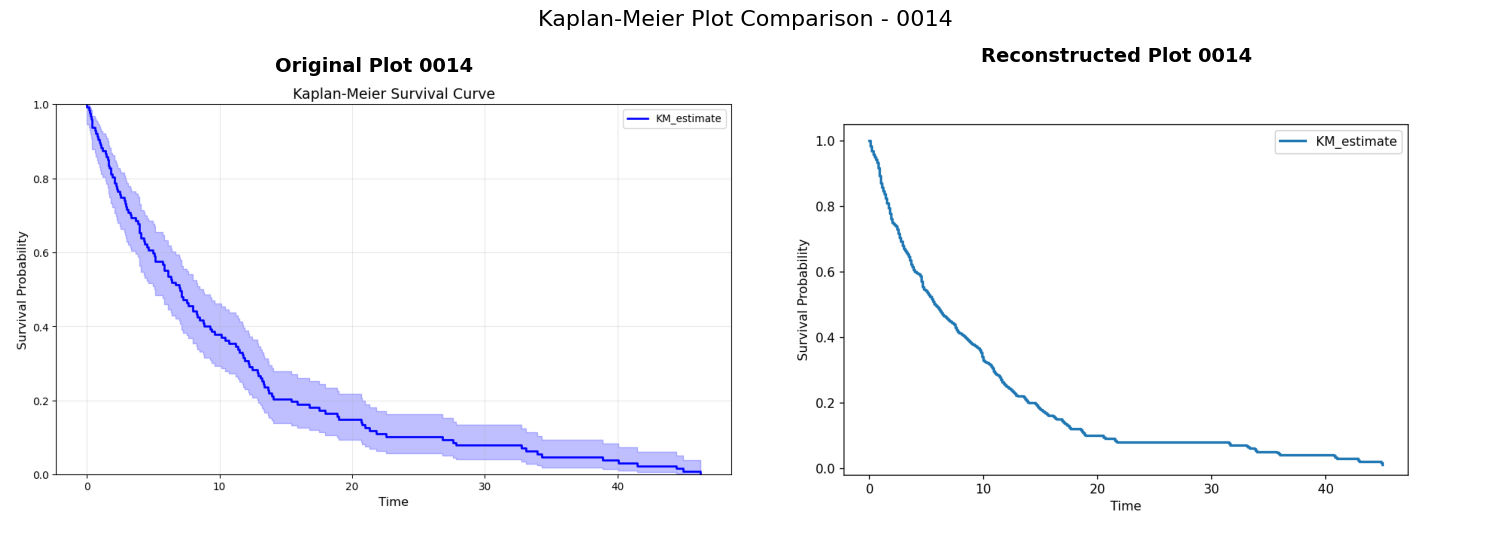

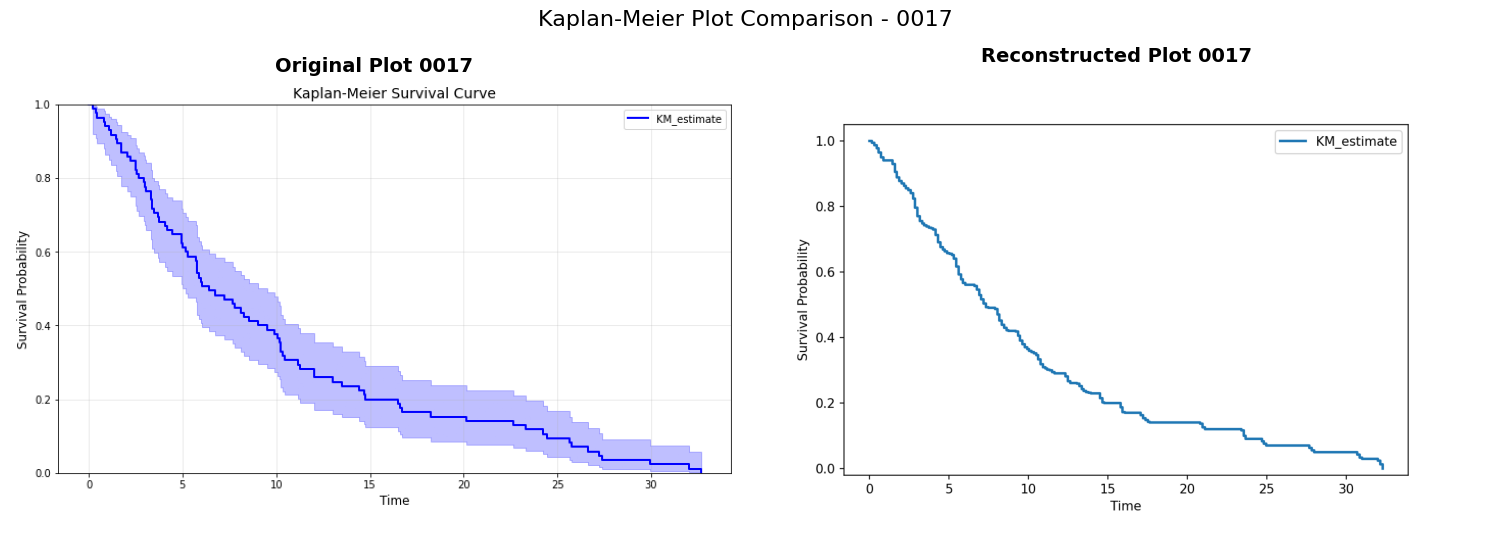

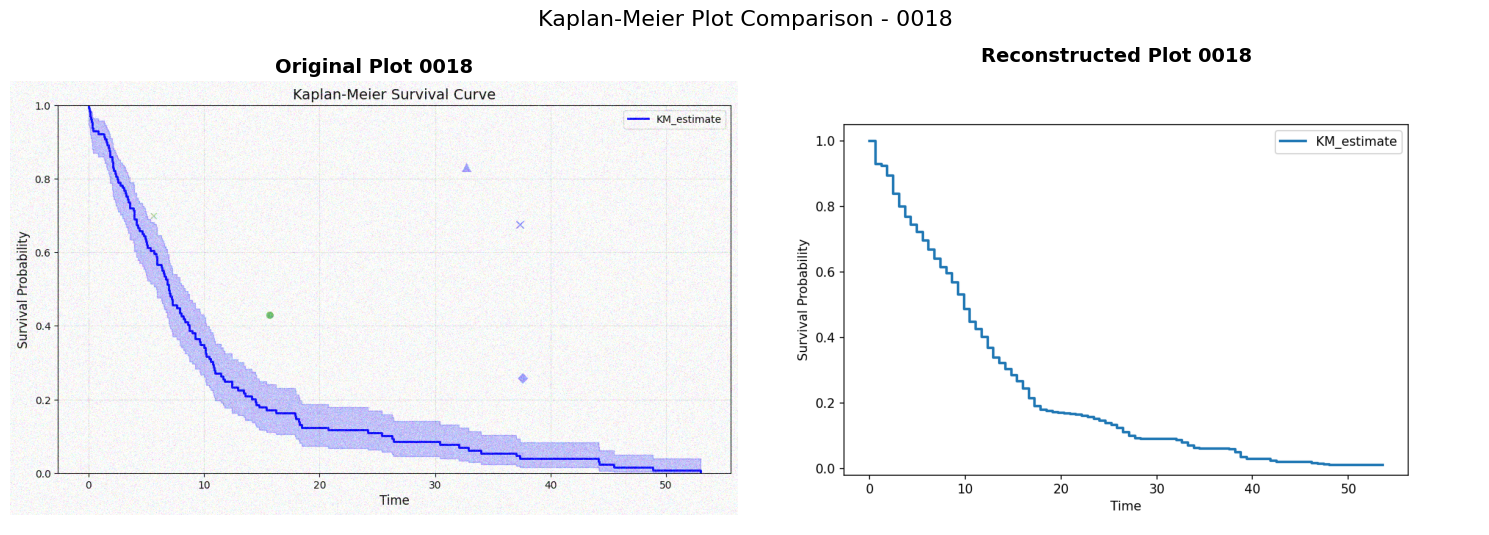

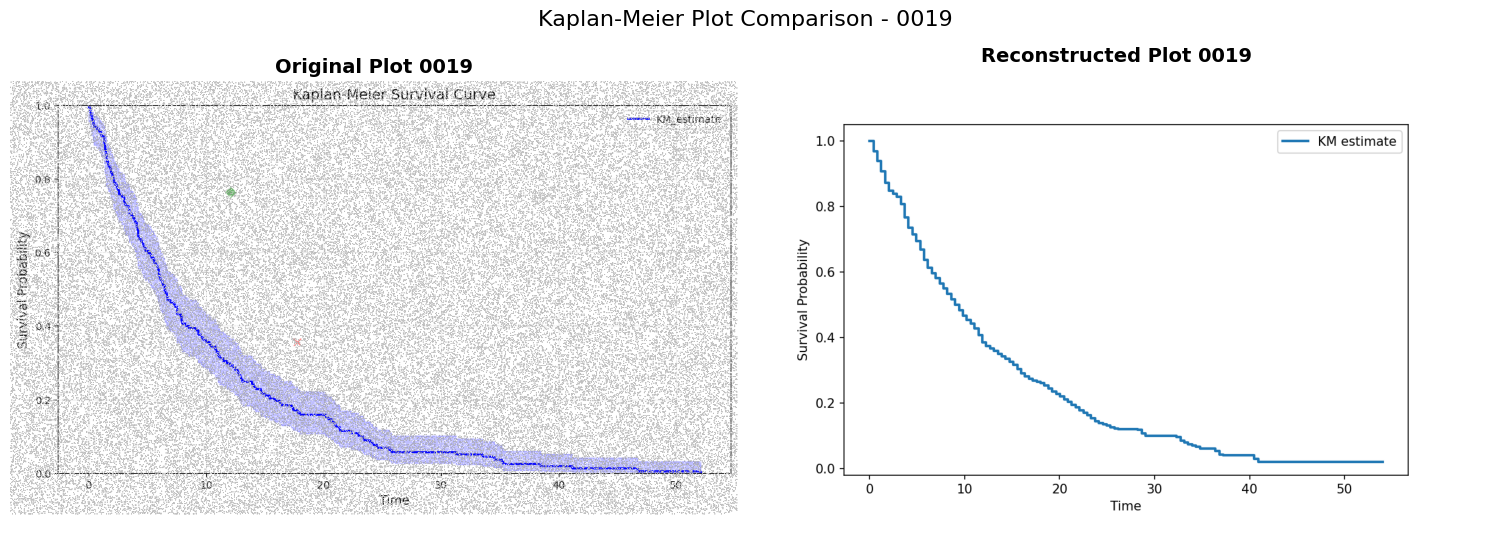

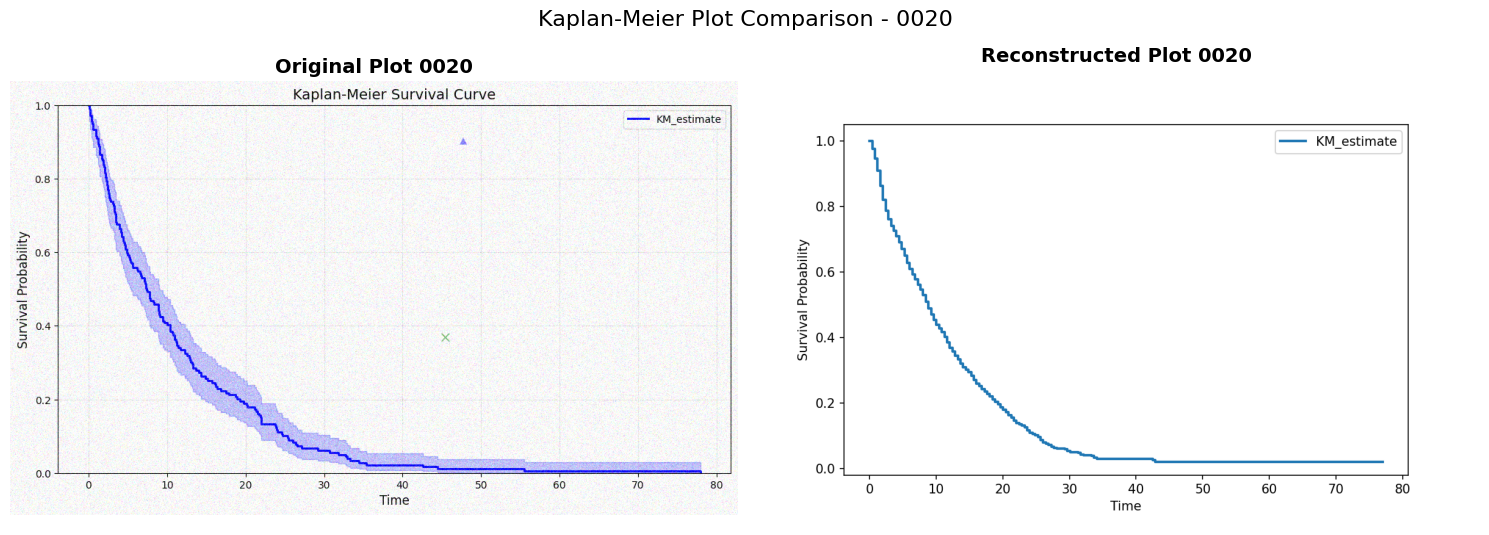

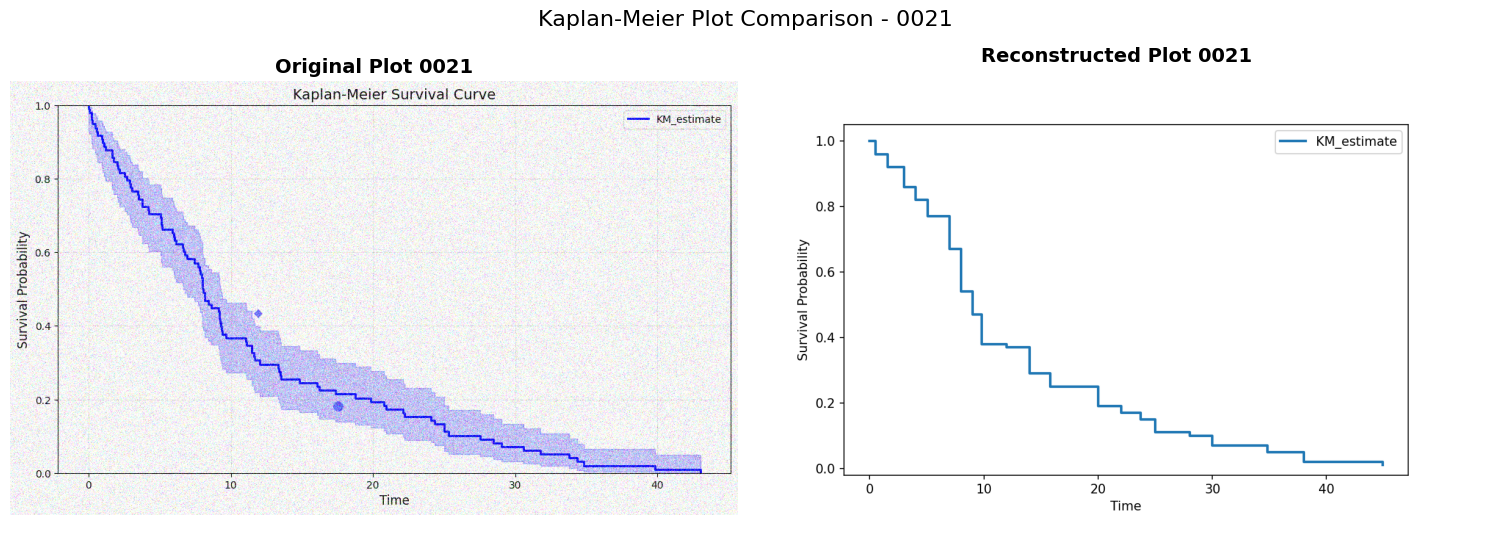

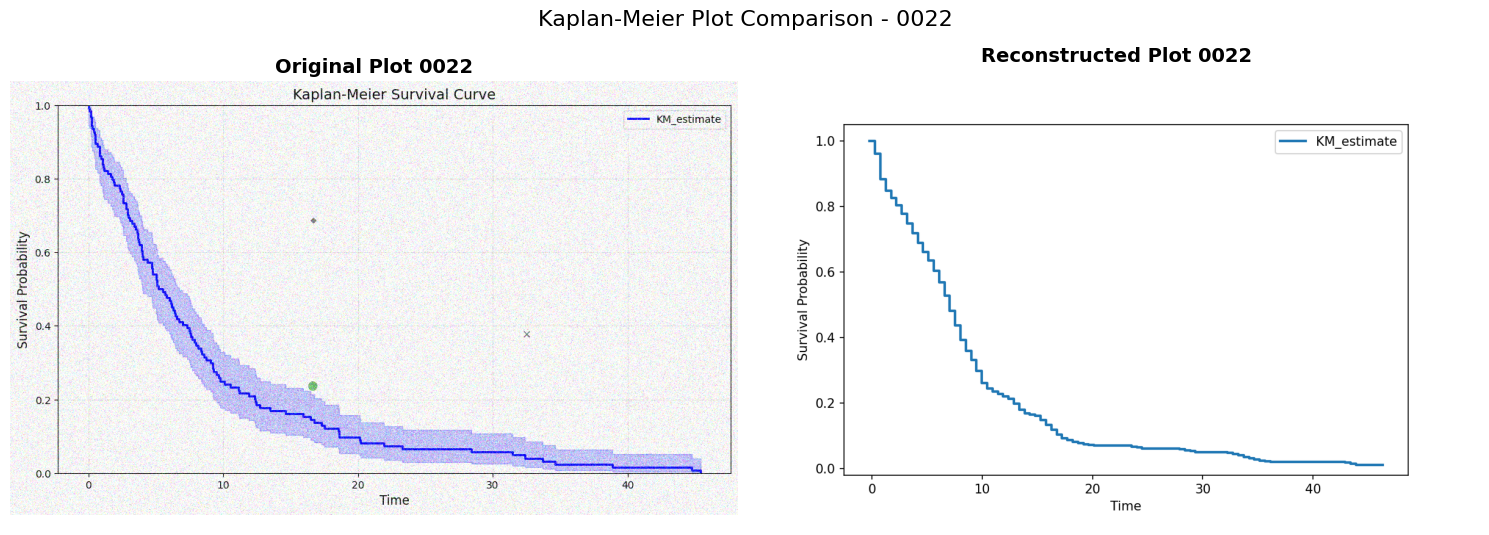

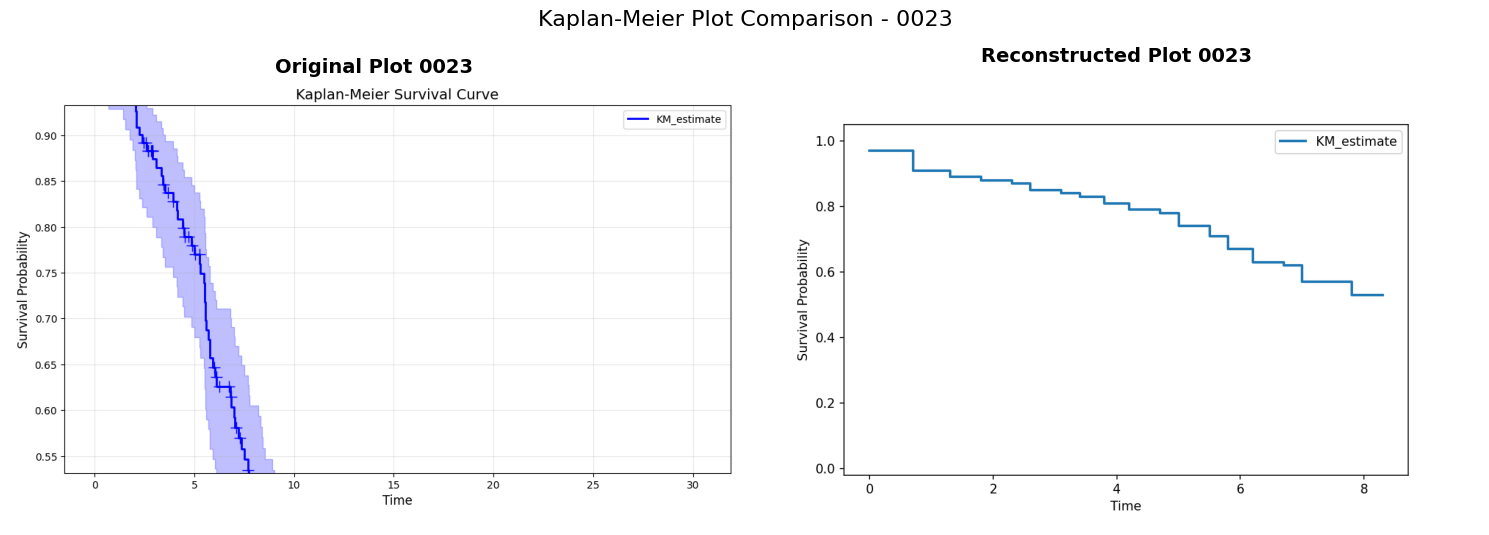

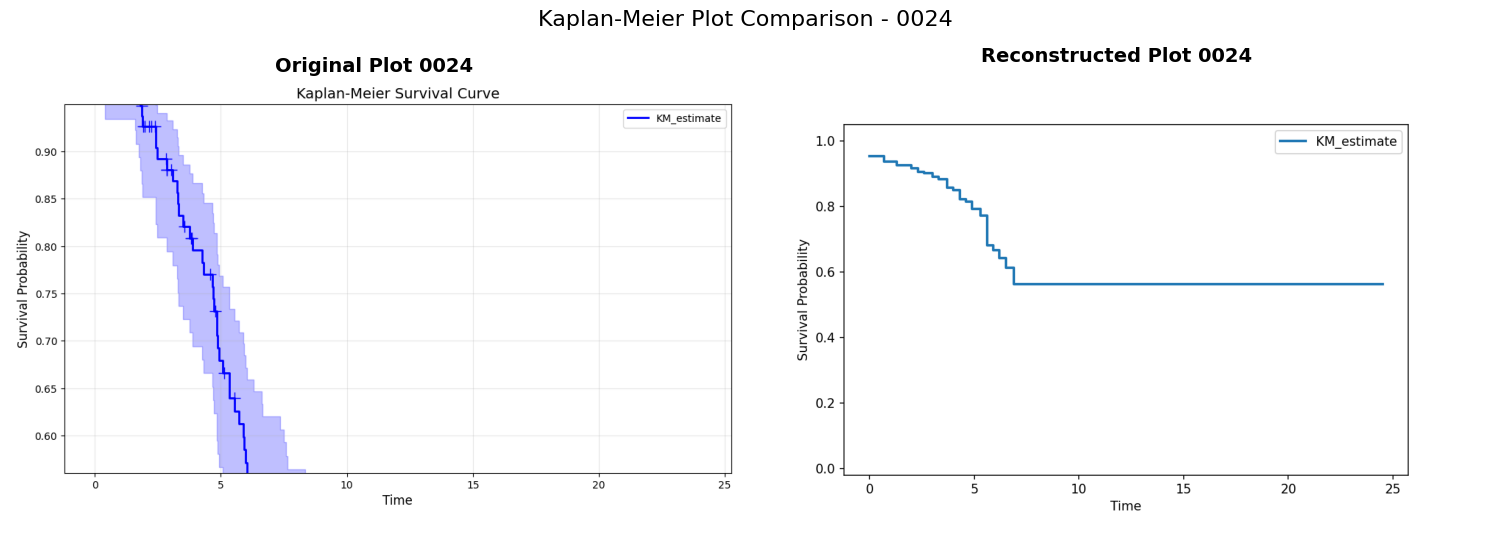

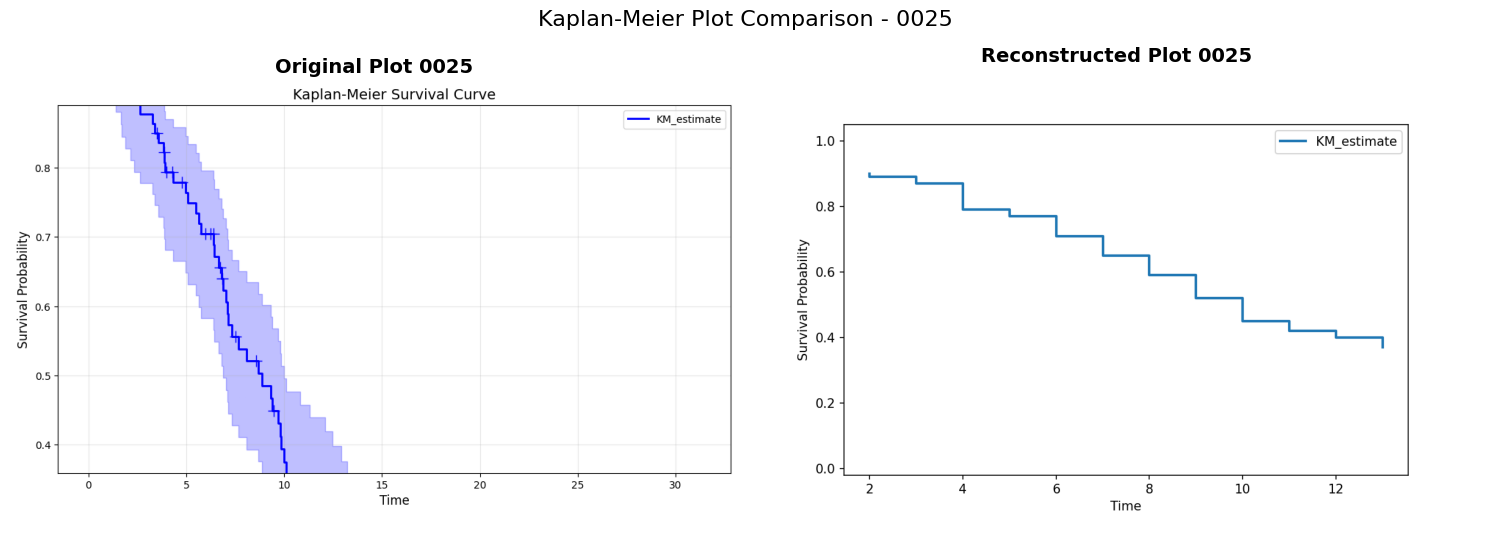

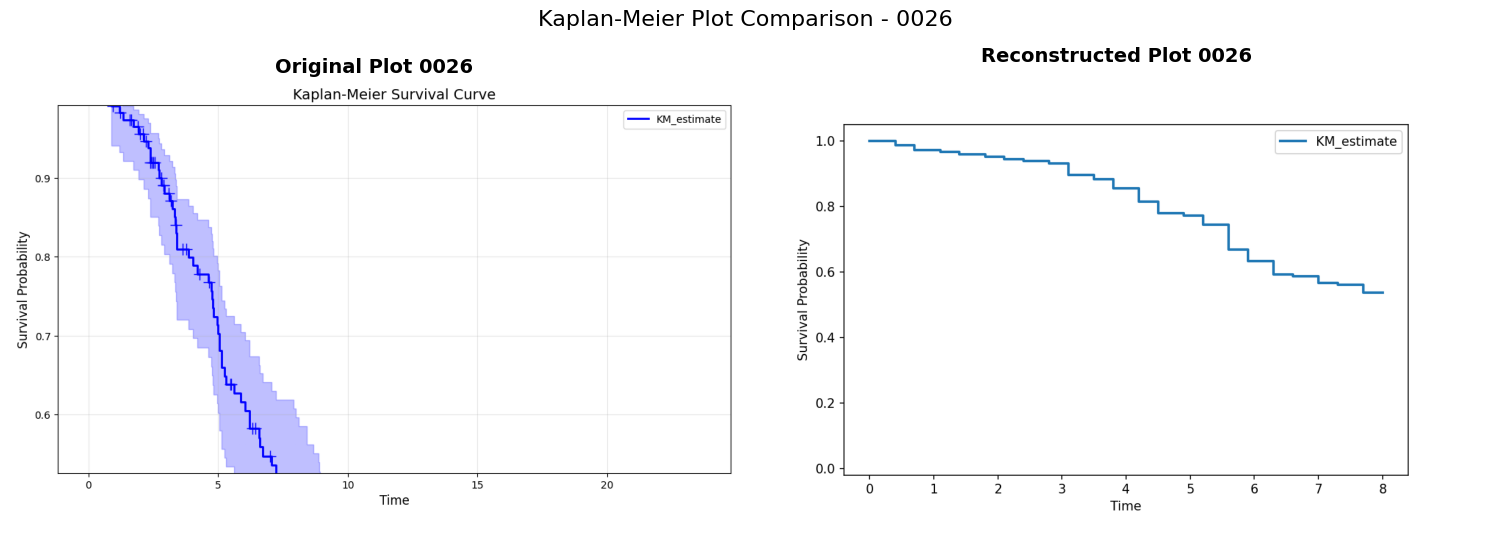

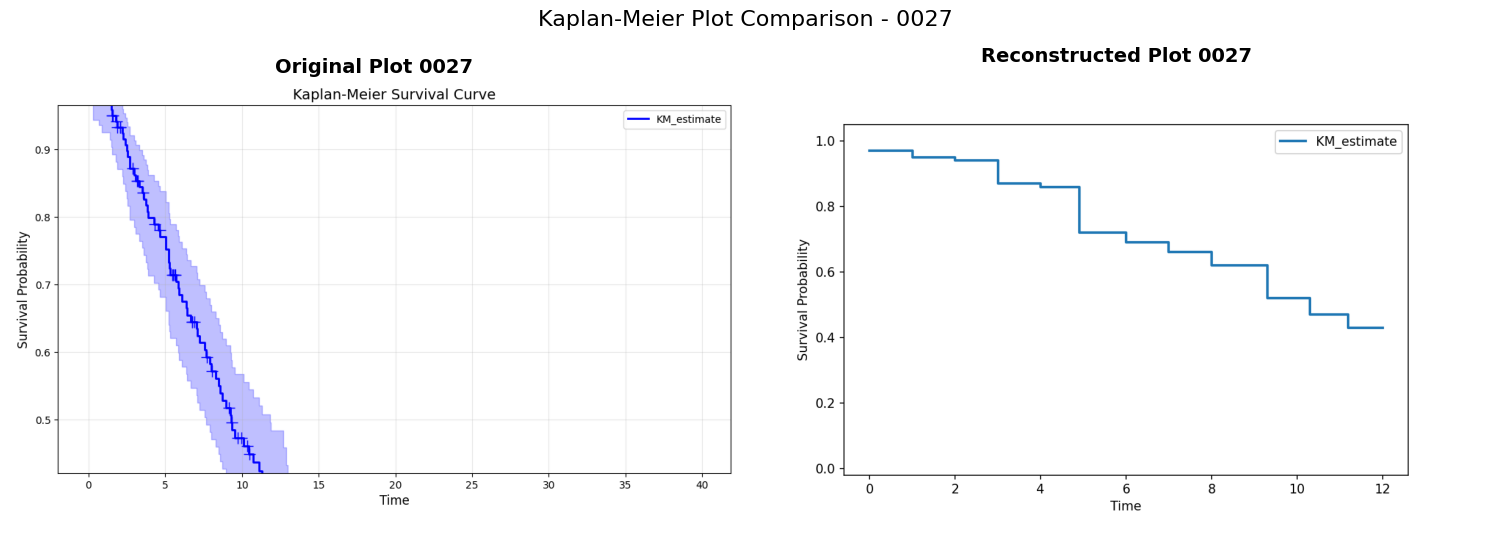

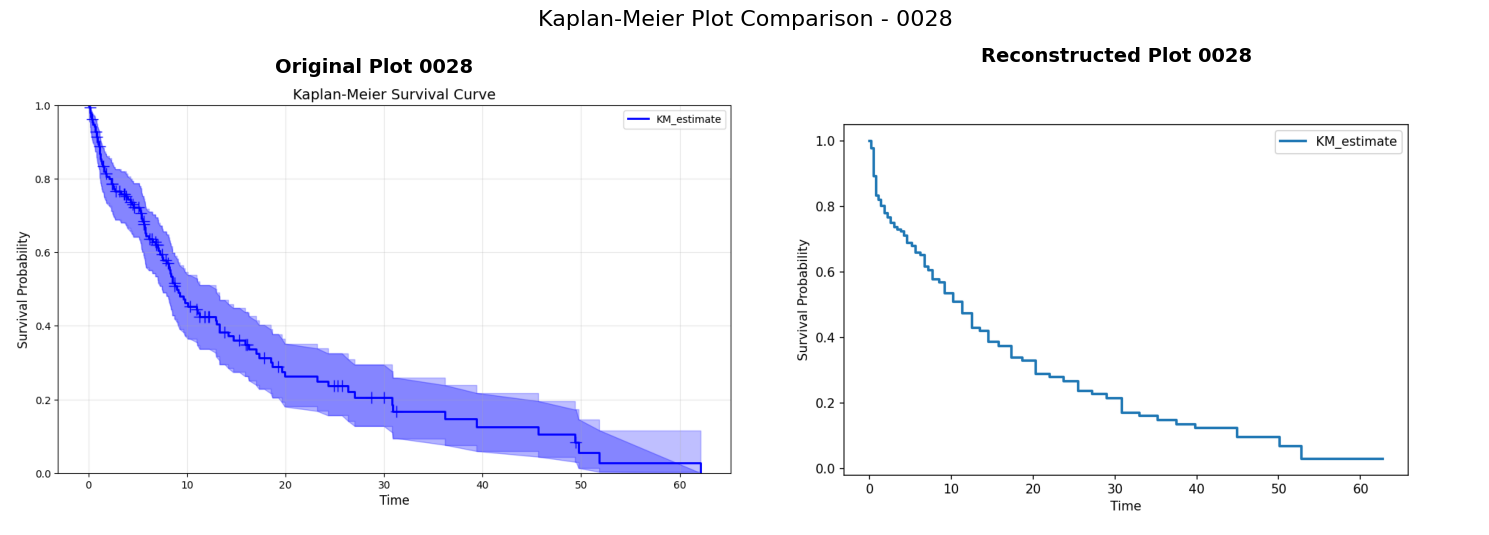

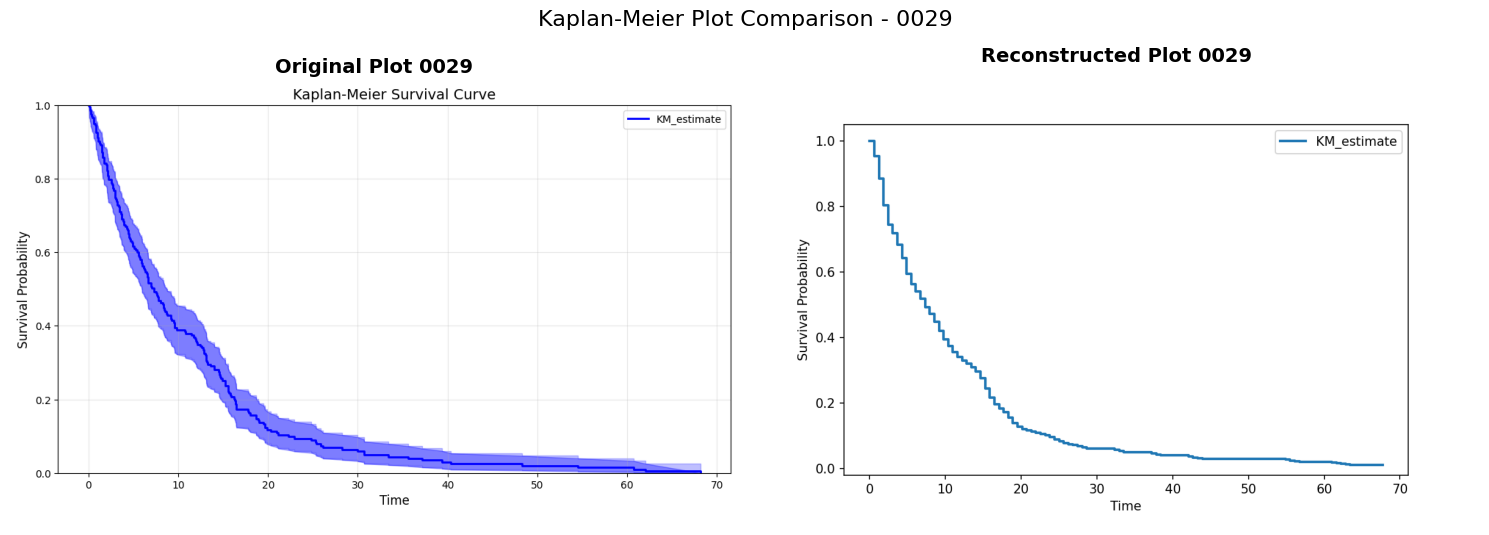

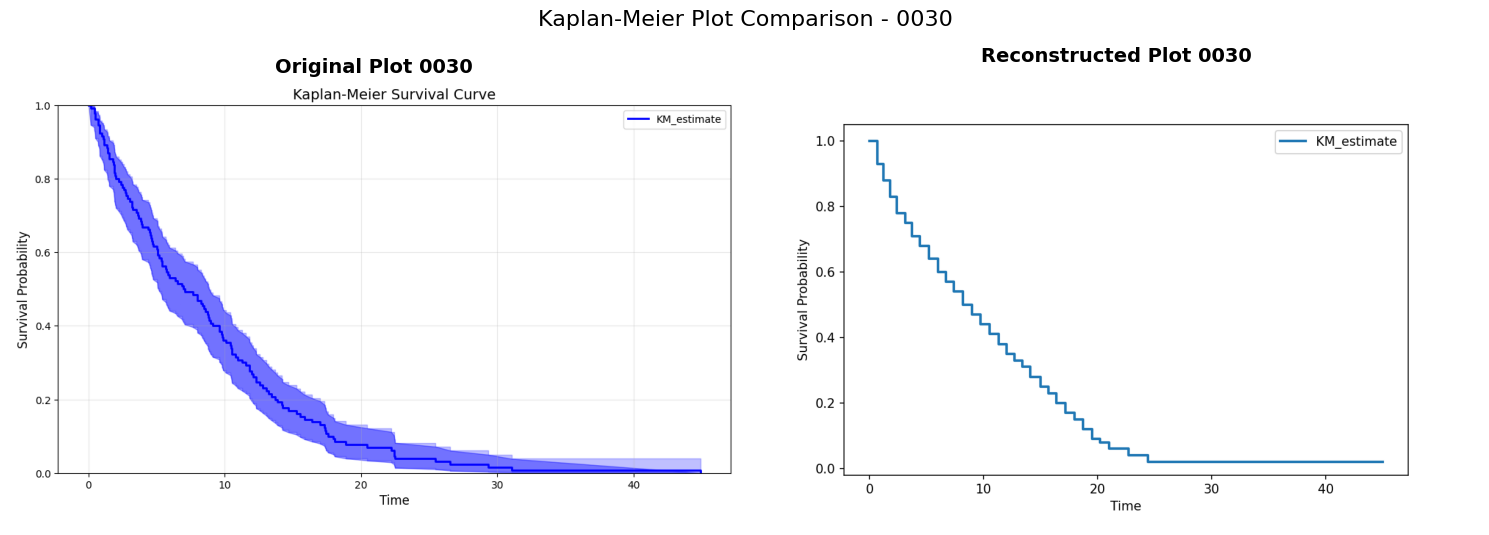

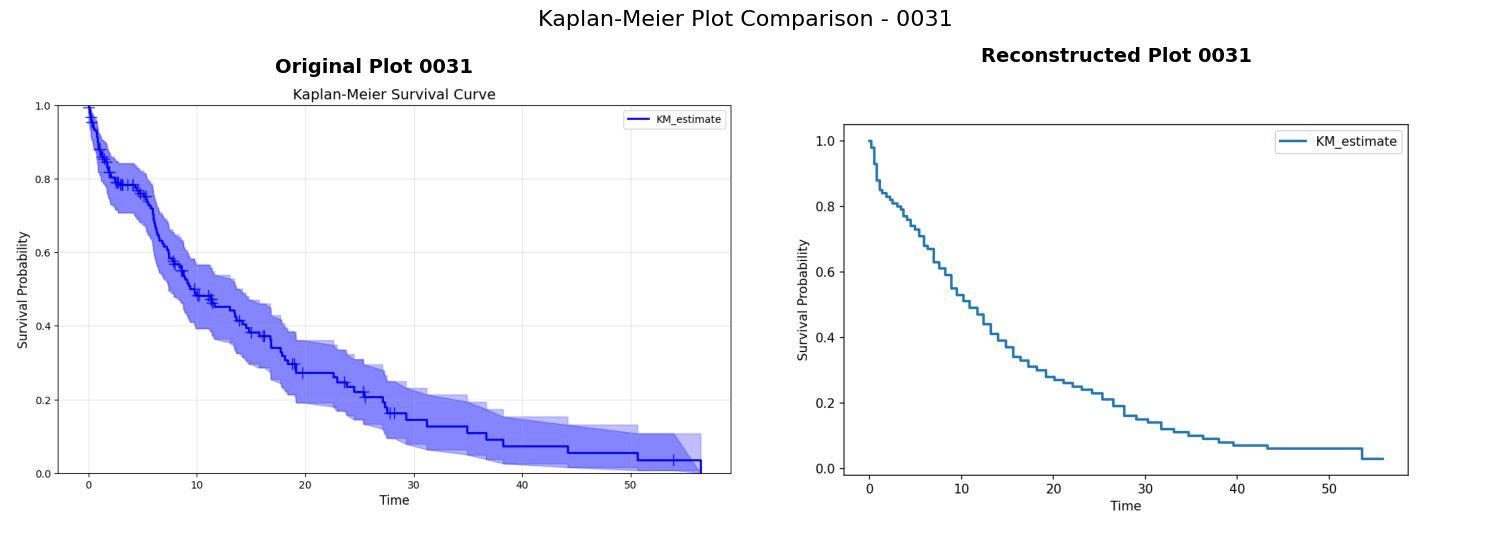

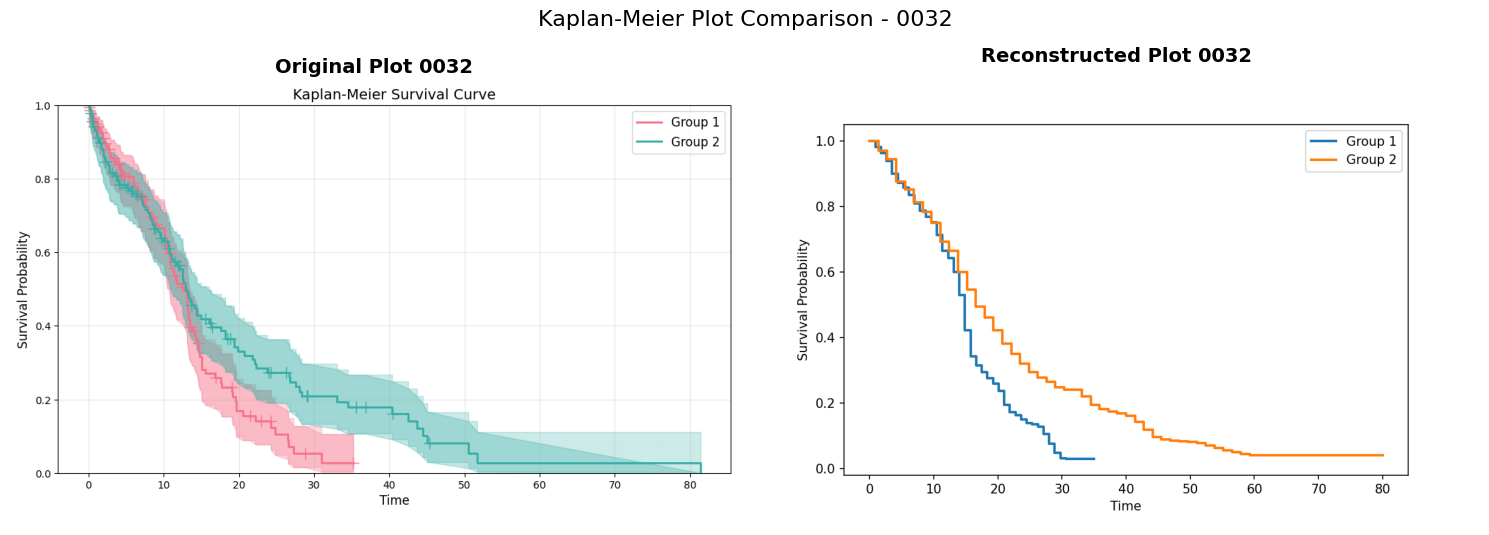

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from pathlib import Path

logs_dir = "../logs/20260203_012649"
plots_dir = Path(logs_dir)

def load_and_categorize_images(directory):
    """Load images and categorize them by type based on filename pattern"""
    image_files = glob.glob(str(directory / "**/*.png"), recursive=True)
    
    categories = {}
    for img_path in image_files:
        filename = os.path.basename(img_path)
        parent_dir = os.path.basename(os.path.dirname(img_path))
        
        if parent_dir.startswith("plot_"):
            parts = parent_dir.split("_")
            if len(parts) >= 2:
                plot_id = parts[1]
                img_type = filename.replace(".png", "")
                
                if plot_id not in categories:
                    categories[plot_id] = {}
                
                categories[plot_id][img_type] = img_path
    
    return categories

def create_comparison_plot(plot_id, image_paths, figsize=(15, 6)):
    """Create side-by-side comparison of original and reconstructed plots"""
    
    original_key = None
    reconstructed_key = None
    
    for key in image_paths.keys():
        if 'original' in key.lower():
            original_key = key
        elif any(word in key.lower() for word in ['final', 'reconstructed', 'recon', 'result']):
            reconstructed_key = key
    
    if not original_key or not reconstructed_key:
        return None
    
    original_img = mpimg.imread(image_paths[original_key])
    reconstructed_img = mpimg.imread(image_paths[reconstructed_key])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    ax1.imshow(original_img)
    ax1.set_title(f'Original Plot {plot_id}', fontsize=14, fontweight='bold')
    ax1.axis('off')
    
    ax2.imshow(reconstructed_img)
    ax2.set_title(f'Reconstructed Plot {plot_id}', fontsize=14, fontweight='bold')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.suptitle(f'Kaplan-Meier Plot Comparison - {plot_id}', fontsize=16, y=0.98)
    
    return fig

image_categories = load_and_categorize_images(plots_dir)

sorted_plot_ids = sorted(image_categories)

for plot_id in sorted_plot_ids:
    image_paths = image_categories[plot_id]
    if len(image_paths) >= 2:
        fig = create_comparison_plot(plot_id, image_paths)
        if fig:
            plt.show()